# Mercedes Benz Greener Manufacturing

### Goal of this project: Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. 

Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

Our end-goal is to reduce the time that cars spend on the test bench using model prediction.

__author__ = "Ovo Okpubuluku"
__email__ = "ovo@live.ca"

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Create Data Class for Importing and reading Datasets

In [2]:
#For Mercedes Benz dataset
class Data:
    def __init__(self, train_data, test_data):
        
        '''loading dataframes'''
        
        self.train_data = train_data
        self.test_data = test_data
        self.process_data()
        
    def process_data(self):
        self._create_train_df()
        self._create_test_df()
        self._column_info()
        self._print_trainstats()
        self._print_teststats()
        self._check_duplicates()
                  
       
    def _create_train_df(self):
        '''loads and prepares train dataframe'''
        self.train_df = self._load_dataset(train_data)
        self.y_train = self.train_df['y'].values
        
    def _create_test_df(self):
        '''loads and encodes labels in test dataframe'''
        self.test_df = self._load_dataset(test_data)
        
    def _column_info(self):
        self.cat_cols = self._cat_cols(self.train_df)
        self.num_cols = self._num_cols(self.train_df)
        
    def _print_trainstats(self):
        print('  \n ----------Train Data Info---------')
        self.printstats(self.train_df)
        self._check_nan(self.train_df)
        
    def _print_teststats(self):
        print('  \n ----------Test Data Info---------')
        self.printstats(self.test_df)
        self._check_nan(self.test_df)
    
    def _load_dataset(self, file):
        return pd.read_csv(file)
    
    def printstats(self, df):
        print('---------------------------------------------------------')
        print('Shape of Dataframe - {}'.format(df.shape))
        print('---------------------------------------------------------')
        print('\n Dataframe Info: \n')
        print('n{}'.format(df.info()))
        print('---------------------------------------------------------')
        print(' Categorical Features Stats: \n \n{}'.format(df.describe(include='O')))
              
    def _check_nan(self, df):
        '''Checks and verifies presence of null values in Dataframe'''
        nan = np.sum(df.isna().sum())
        if nan == 0:
            print('\n\n : There are no null values in the dataframes')
        else:
            print('The following columns have null values\n\n{}'.format(df.isnull().sum()))
              
    def _cat_cols(self, df):
        '''finds and lists Categorical Columns in Dataframe'''
        self.cat_cols = df.select_dtypes(include=['O']).columns.tolist()
        print('Categorical Columns list: {}'.format(self.cat_cols))
        print('---------------------------------------------------------------------')
        return self.cat_cols
              
    def _num_cols(self, df):
        '''finds and lists Numerical Columns in Dataframe'''
        self.num_cols = df.select_dtypes(exclude=['O']).columns.tolist()
        return self.num_cols
              
              
    def _check_duplicates(self):
        '''Checks presence of duplicate entries'''
        print('\n : There are {} duplicate values in Train Data'.format(self.train_df.duplicated().sum()))
        print('\n : There are {} duplicate values in Test Data'.format(self.test_df.duplicated().sum()))

In [3]:
#Defining Dataset locations for upload
train_data = './train.csv'
test_data = './test.csv'

#Reading the Datasets
data = Data(train_data, test_data)

Categorical Columns list: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
---------------------------------------------------------------------
  
 ----------Train Data Info---------
---------------------------------------------------------
Shape of Dataframe - (4209, 378)
---------------------------------------------------------

 Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
nNone
---------------------------------------------------------
 Categorical Features Stats: 
 
          X0    X1    X2    X3    X4    X5    X6    X8
count   4209  4209  4209  4209  4209  4209  4209  4209
unique    47    27    44     7     4    29    12    25
top        z    aa    as     c     d     v     g     j
freq     360   833  1659  1942  4205   231  1042   277


 : There are no null values in the dataframes
  
 ----------Test Data Info---------
------------------

## Exploratory Data Analysis

In [8]:
print(data.train_df.shape)
data.train_df.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(data.test_df.shape)
data.test_df.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


###MArk

## Create Plots Class for Visualizations

Upon close examination of the data, the features from X0 to X8 listed as categorical actually contain object data type. The numeric features in the rest of the columns are binary integers

In [10]:
class Plots:
    '''For taking a closer look at the Target Column(y)'''
    sns.set(style="darkgrid")
    
    def __init__(self, data):
        self.data = data
        self.train_df = data.train_df
        self.test_df = data.test_df
        self.cat_cols = data.cat_cols
        self.num_cols = data.num_cols
        self.y_train = data.y_train
        self.eda_process()
        
    def eda_process(self):
        self._distplot()
        self._lineplot()
        self._scatterplot()
        self._barplots()
        
    def _distplot(self):
        '''Creates Distribution Plots for Target Value'''
        plt.figure(figsize=(15, 5))
        sns.distplot(self.y_train, bins=100, color = 'purple')
        plt.xlabel('Target value (seconds)')
        plt.ylabel('Frequency')
        plt.title('Distribution of the target value', fontsize=15)
        print('min: {} max: {} mean: {} std: {}'.format(min(self.y_train), max(self.y_train),\
                                                        self.y_train.mean(), self.y_train.std()))
        print('Count of values above 200: {}'.format(np.sum(self.y_train > 200)))
        plt.show()
            
    def _lineplot(self):
        '''Creates Lineplot for Target'''
        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train, color = 'green')
        plt.xlabel('Row ID')
        plt.ylabel('Target')
        plt.title('Change in target value over the dataset', fontsize=15)
        plt.show()

        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train[:75], color ='green')
        plt.xlabel('ID')
        plt.ylabel('Target value')
        plt.title('Change in target value over the first 75 samples', fontsize=15)
        plt.show()
        
    def _scatterplot(self):
        '''Creates Scatterplot for Target'''
        plt.figure(figsize=(15,8))
        plt.scatter(range(self.y_train.shape[0]), np.sort(self.y_train), color='r')
        plt.xlabel('index')
        plt.ylabel('Target Value')
        plt.title('Scatterplot of sorted Target Values', fontsize=15)
        plt.show()
        
    def _barplots(self):
        for col in data.cat_cols:
            value_counts = self.train_df[col].value_counts()
            fig, ax = plt.subplots(figsize=(12, 5))
            plt.title('Categorical Feature {} - Cardinality {}'.format(col, len(np.unique(self.train_df[col]))))
            plt.xlabel('Feature')
            plt.ylabel('Counts')
            plt.bar(range(len(value_counts)), value_counts.values)
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation='vertical')
            plt.tight_layout()
    

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 200: 1


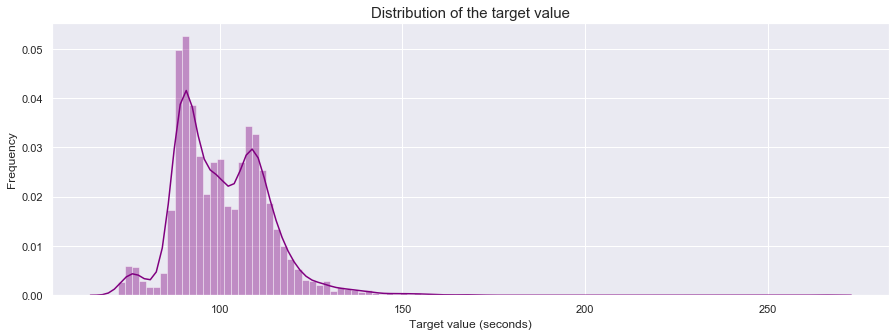

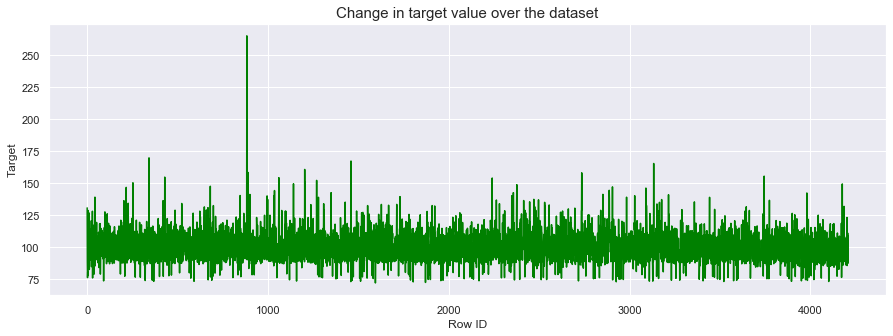

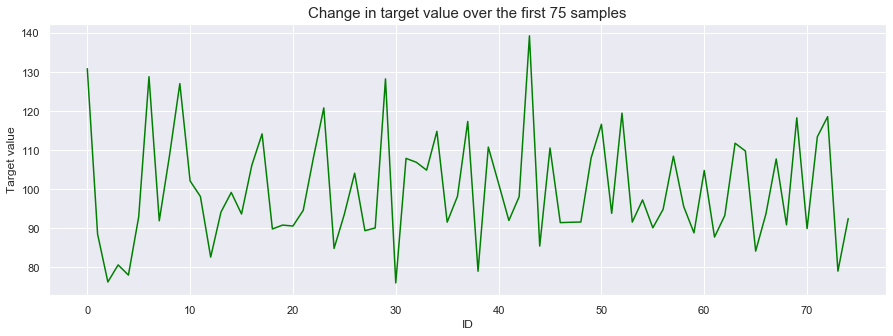

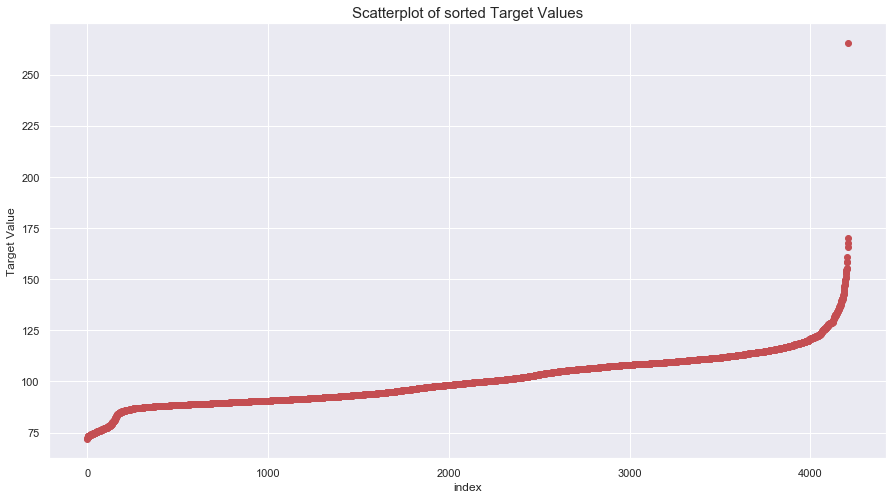

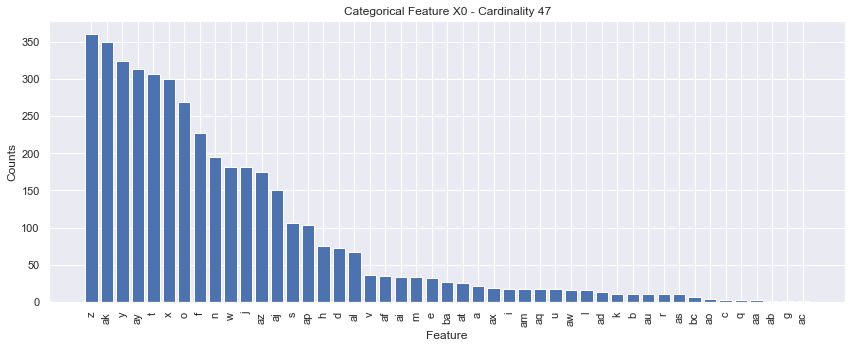

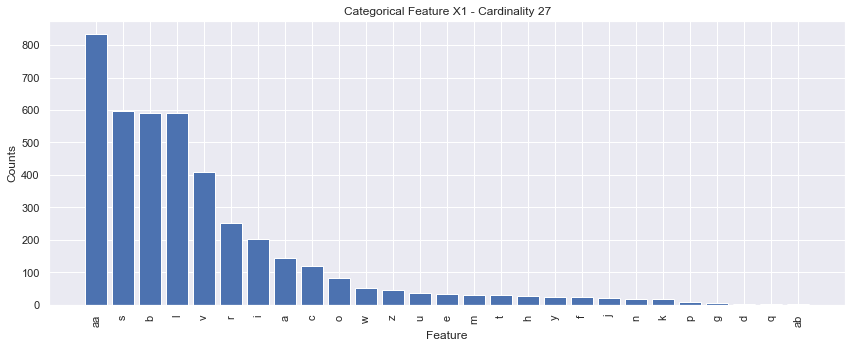

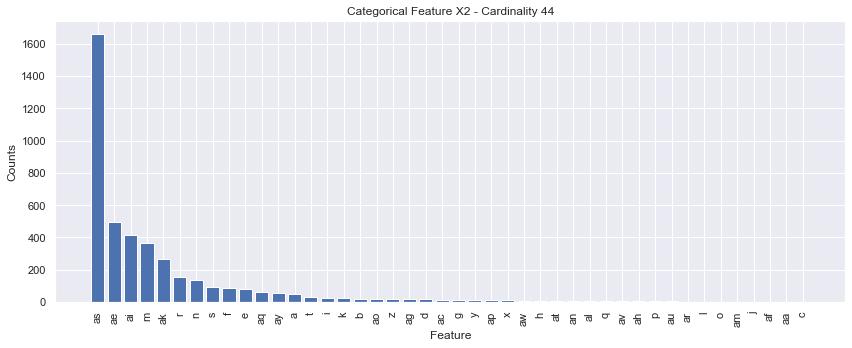

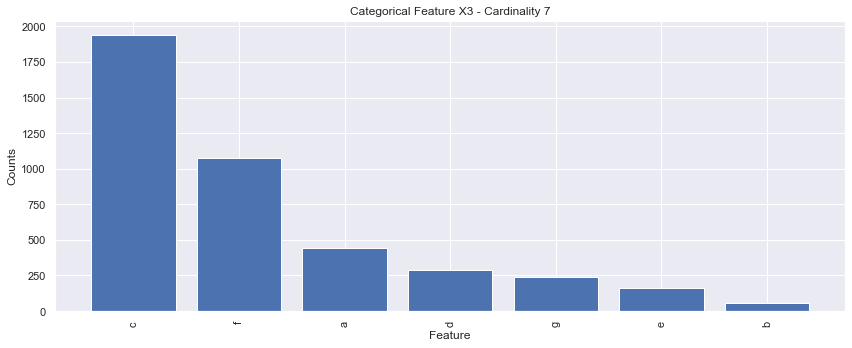

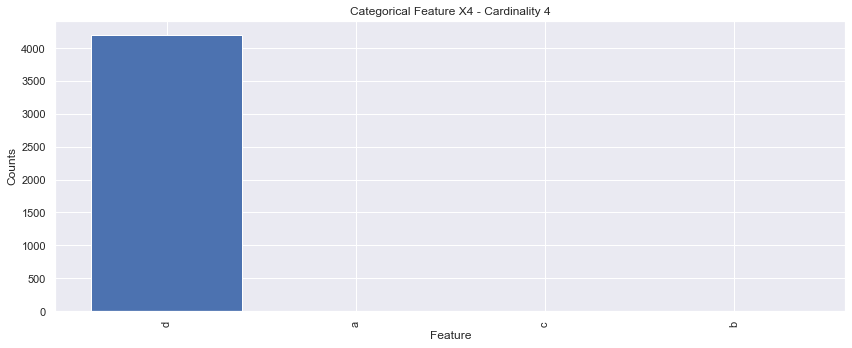

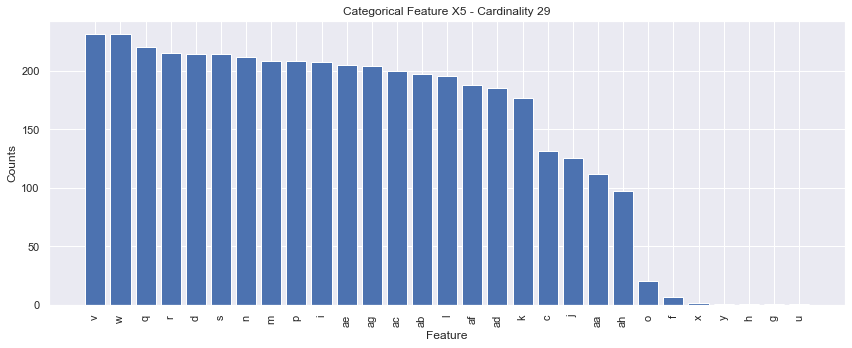

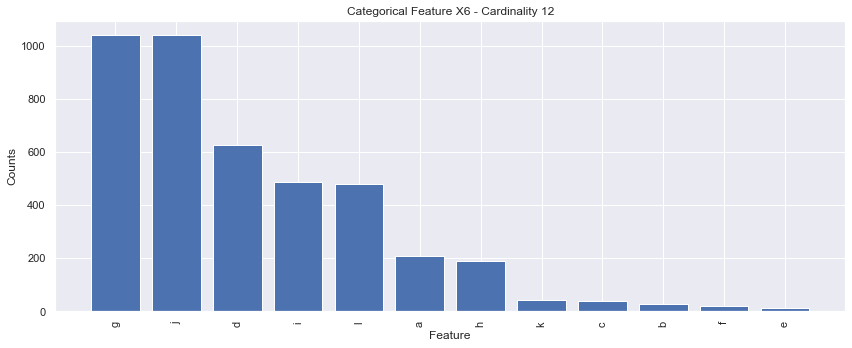

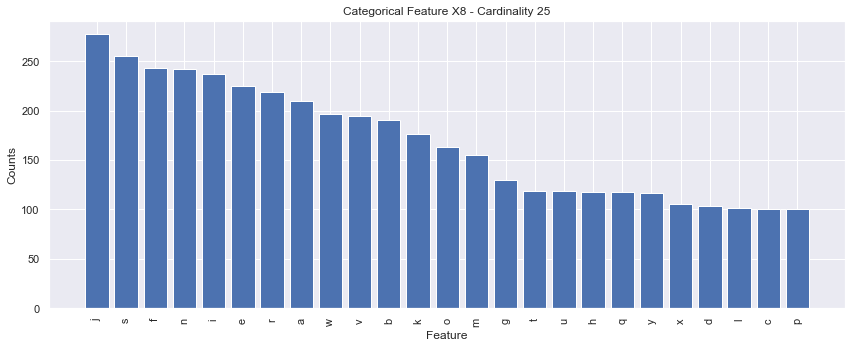

In [11]:
visuals = Plots(data)

In [12]:
zero_std = pd.DataFrame(data.train_df.std()==0)

In [13]:
zero_std.head()

,0
ID,False
y,False
X10,False
X11,True
X12,False


In [14]:
zero_std.columns = ['status']

In [15]:
(zero_std.loc[zero_std['status']== True])

,status
X11,True
X93,True
X107,True
X233,True
X235,True
X268,True
X289,True
X290,True
X293,True
X297,True


In [16]:
invalid_cols = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289','X290', 'X293', 'X297', 'X330', 'X347']
train_set = data.train_df.drop(columns = invalid_cols)
test_set = data.test_df.drop(columns = invalid_cols)

In [17]:
cat_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train_set[col].values))
    train_set[col] = le.transform(list(train_set[col].values))
    le.fit(list(test_set[col].values))
    test_set[col] = le.transform(list(test_set[col].values))

x_train = train_set.drop(['y','ID'], axis=1)

y_train = train_set['y'].values

x_test = test_set.drop(['ID'], axis=1)

In [18]:
pca = PCA(n_components=0.95)

In [19]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(x_train.shape)
x_train_transformed = pca.transform(x_train)
print(x_train_transformed.shape)

(4209, 364)
(4209, 6)


In [21]:
print(x_test.shape)
x_test_transformed = pca.transform(x_test)
print(x_test_transformed.shape)

(4209, 364)
(4209, 6)


In [22]:
pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5
0,0.614765,-0.133009,15.624460,3.687564,1.359574,-2.691417
1,0.565407,1.560333,17.909581,-0.092902,1.536648,-4.442877
2,16.201713,12.292846,17.633540,0.186308,11.850820,-2.155389
3,16.149998,13.535419,14.898695,-3.140917,-6.832193,-4.290014
4,16.459103,13.175004,4.403096,7.671151,2.139916,3.763860
...,...,...,...,...,...,...
4204,22.161403,-7.184320,-8.659404,10.774860,4.669902,3.527910
4205,6.153949,22.828146,-8.314658,10.303221,-3.089276,0.073621
4206,29.004660,14.860905,-7.753332,11.224415,-5.846985,0.789306
4207,22.972422,1.684824,-9.031248,9.749805,9.449557,-4.355228


In [33]:
d_train = xgb.DMatrix(x_train_transformed, y_train)
d_test = xgb.DMatrix(x_test_transformed)

param = {'max_depth':4, 'eta':1, 'objective': 'reg:linear'}

#function credited to anokas, from Kaggle
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train')]
    
bst = xgb.train(param, d_train, 2000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True)

pred = bst.predict(d_test)

[19:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:11.12775	train-r2:0.22959
Multiple eval metrics have been passed: 'train-r2' will be used for early stopping.

Will train until train-r2 hasn't improved in 50 rounds.
[1]	train-rmse:10.68642	train-r2:0.28949
[2]	train-rmse:10.36922	train-r2:0.33104
[3]	train-rmse:10.17309	train-r2:0.35611
[4]	train-rmse:10.03774	train-r2:0.37313
[5]	train-rmse:9.85594	train-r2:0.39563
[6]	train-rmse:9.70590	train-r2:0.41389
[7]	train-rmse:9.60400	train-r2:0.42613
[8]	train-rmse:9.43322	train-r2:0.44636
[9]	train-rmse:9.33958	train-r2:0.45730
[10]	train-rmse:9.25766	train-r2:0.46678
[11]	train-rmse:9.18531	train-r2:0.47508
[12]	train-rmse:9.11724	train-r2:0.48283
[13]	train-rmse:8.96963	train-r2:0.49944
[14]	train-rmse:8.85666	train-r2:0.51197
[15]	train-rmse:8.75333	train-r2:0.52329
[16]	train-rmse:8.64225	train-r

[190]	train-rmse:3.17426	train-r2:0.93731
[191]	train-rmse:3.16387	train-r2:0.93772
[192]	train-rmse:3.16009	train-r2:0.93787
[193]	train-rmse:3.15545	train-r2:0.93805
[194]	train-rmse:3.14647	train-r2:0.93840
[195]	train-rmse:3.13893	train-r2:0.93870
[196]	train-rmse:3.12433	train-r2:0.93927
[197]	train-rmse:3.10729	train-r2:0.93993
[198]	train-rmse:3.09493	train-r2:0.94041
[199]	train-rmse:3.08998	train-r2:0.94060
[200]	train-rmse:3.08355	train-r2:0.94084
[201]	train-rmse:3.07132	train-r2:0.94131
[202]	train-rmse:3.06084	train-r2:0.94171
[203]	train-rmse:3.05066	train-r2:0.94210
[204]	train-rmse:3.04274	train-r2:0.94240
[205]	train-rmse:3.04047	train-r2:0.94248
[206]	train-rmse:3.02644	train-r2:0.94301
[207]	train-rmse:3.02029	train-r2:0.94325
[208]	train-rmse:3.01513	train-r2:0.94344
[209]	train-rmse:3.00547	train-r2:0.94380
[210]	train-rmse:2.99168	train-r2:0.94432
[211]	train-rmse:2.98271	train-r2:0.94465
[212]	train-rmse:2.97627	train-r2:0.94489
[213]	train-rmse:2.96895	train-r2:

[386]	train-rmse:2.28509	train-r2:0.96751
[387]	train-rmse:2.28361	train-r2:0.96756
[388]	train-rmse:2.28256	train-r2:0.96759
[389]	train-rmse:2.28107	train-r2:0.96763
[390]	train-rmse:2.27948	train-r2:0.96767
[391]	train-rmse:2.27805	train-r2:0.96771
[392]	train-rmse:2.27644	train-r2:0.96776
[393]	train-rmse:2.27552	train-r2:0.96778
[394]	train-rmse:2.27485	train-r2:0.96780
[395]	train-rmse:2.27359	train-r2:0.96784
[396]	train-rmse:2.27140	train-r2:0.96790
[397]	train-rmse:2.26958	train-r2:0.96795
[398]	train-rmse:2.26821	train-r2:0.96799
[399]	train-rmse:2.26696	train-r2:0.96803
[400]	train-rmse:2.26496	train-r2:0.96808
[401]	train-rmse:2.26329	train-r2:0.96813
[402]	train-rmse:2.26241	train-r2:0.96815
[403]	train-rmse:2.26041	train-r2:0.96821
[404]	train-rmse:2.25859	train-r2:0.96826
[405]	train-rmse:2.25716	train-r2:0.96830
[406]	train-rmse:2.25635	train-r2:0.96832
[407]	train-rmse:2.25515	train-r2:0.96836
[408]	train-rmse:2.25452	train-r2:0.96838
[409]	train-rmse:2.25368	train-r2:

[582]	train-rmse:2.15923	train-r2:0.97099
[583]	train-rmse:2.15909	train-r2:0.97100
[584]	train-rmse:2.15900	train-r2:0.97100
[585]	train-rmse:2.15885	train-r2:0.97100
[586]	train-rmse:2.15857	train-r2:0.97101
[587]	train-rmse:2.15843	train-r2:0.97101
[588]	train-rmse:2.15824	train-r2:0.97102
[589]	train-rmse:2.15800	train-r2:0.97103
[590]	train-rmse:2.15773	train-r2:0.97103
[591]	train-rmse:2.15750	train-r2:0.97104
[592]	train-rmse:2.15729	train-r2:0.97105
[593]	train-rmse:2.15712	train-r2:0.97105
[594]	train-rmse:2.15692	train-r2:0.97106
[595]	train-rmse:2.15682	train-r2:0.97106
[596]	train-rmse:2.15677	train-r2:0.97106
[597]	train-rmse:2.15668	train-r2:0.97106
[598]	train-rmse:2.15649	train-r2:0.97107
[599]	train-rmse:2.15621	train-r2:0.97107
[600]	train-rmse:2.15604	train-r2:0.97108
[601]	train-rmse:2.15599	train-r2:0.97108
[602]	train-rmse:2.15592	train-r2:0.97108
[603]	train-rmse:2.15585	train-r2:0.97108
[604]	train-rmse:2.15583	train-r2:0.97108
[605]	train-rmse:2.15567	train-r2:

[778]	train-rmse:2.14503	train-r2:0.97137
[779]	train-rmse:2.14503	train-r2:0.97137
[780]	train-rmse:2.14501	train-r2:0.97137
[781]	train-rmse:2.14500	train-r2:0.97137
[782]	train-rmse:2.14498	train-r2:0.97137
[783]	train-rmse:2.14497	train-r2:0.97137
[784]	train-rmse:2.14495	train-r2:0.97137
[785]	train-rmse:2.14492	train-r2:0.97138
[786]	train-rmse:2.14488	train-r2:0.97138
[787]	train-rmse:2.14486	train-r2:0.97138
[788]	train-rmse:2.14485	train-r2:0.97138
[789]	train-rmse:2.14482	train-r2:0.97138
[790]	train-rmse:2.14481	train-r2:0.97138
[791]	train-rmse:2.14479	train-r2:0.97138
[792]	train-rmse:2.14478	train-r2:0.97138
[793]	train-rmse:2.14476	train-r2:0.97138
[794]	train-rmse:2.14475	train-r2:0.97138
[795]	train-rmse:2.14474	train-r2:0.97138
[796]	train-rmse:2.14473	train-r2:0.97138
[797]	train-rmse:2.14472	train-r2:0.97138
[798]	train-rmse:2.14470	train-r2:0.97138
[799]	train-rmse:2.14469	train-r2:0.97138
[800]	train-rmse:2.14468	train-r2:0.97138
[801]	train-rmse:2.14467	train-r2:

[974]	train-rmse:2.14340	train-r2:0.97142
[975]	train-rmse:2.14339	train-r2:0.97142
[976]	train-rmse:2.14339	train-r2:0.97142
[977]	train-rmse:2.14339	train-r2:0.97142
[978]	train-rmse:2.14339	train-r2:0.97142
[979]	train-rmse:2.14338	train-r2:0.97142
[980]	train-rmse:2.14338	train-r2:0.97142
[981]	train-rmse:2.14338	train-r2:0.97142
[982]	train-rmse:2.14338	train-r2:0.97142
[983]	train-rmse:2.14338	train-r2:0.97142
[984]	train-rmse:2.14337	train-r2:0.97142
[985]	train-rmse:2.14337	train-r2:0.97142
[986]	train-rmse:2.14337	train-r2:0.97142
[987]	train-rmse:2.14337	train-r2:0.97142
[988]	train-rmse:2.14337	train-r2:0.97142
[989]	train-rmse:2.14336	train-r2:0.97142
[990]	train-rmse:2.14336	train-r2:0.97142
[991]	train-rmse:2.14336	train-r2:0.97142
[992]	train-rmse:2.14336	train-r2:0.97142
[993]	train-rmse:2.14335	train-r2:0.97142
[994]	train-rmse:2.14335	train-r2:0.97142
[995]	train-rmse:2.14335	train-r2:0.97142
[996]	train-rmse:2.14335	train-r2:0.97142
[997]	train-rmse:2.14334	train-r2:

In [35]:
model_view = pd.DataFrame()
model_view['ID'] = test_set['ID'].values
model_view['Predicted y values'] = pred
model_view.to_csv('model.csv', index=False)

In [36]:
model_view.head(10)

,ID,Predicted y values
0,1,98.780426
1,2,100.246071
2,3,103.496605
3,4,89.095886
4,5,81.443970
5,8,89.099014
6,10,113.691246
7,11,100.069824
8,12,123.700890
9,14,95.032532
